In [4]:
import numpy as np

import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

 MNIST dataset is in use.

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
num_labels = len(np.unique(y_train))
num_labels

10

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
indices = np.random.randint(0, x_train.shape[0], size=16)
images = x_train[indices]

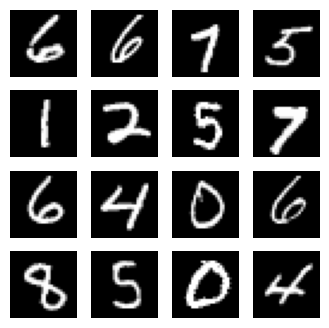

In [13]:
plt.figure(figsize=(4,4))
for i in range(len(indices)):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train)

In [16]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
y_test = to_categorical(y_test)

In [18]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [19]:
x_train[0].shape

(28, 28)

In [20]:
x_train = np.reshape(x_train, [-1, input_size])

In [21]:
x_train[0].shape

(784,)

In [22]:
x_test = np.reshape(x_test, [-1, input_size])

In [23]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Imported Sequential model from Keras. Imported Dense and Dropout layers from Keras.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
model = Sequential()
model.add(Dense(512, input_dim=input_size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20


2023-07-26 18:24:06.911736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9277

2023-07-26 18:25:56.152464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 117s 69ms/step - loss: 0.2338 - accuracy: 0.9277 - val_loss: 0.1328 - val_accuracy: 0.9593
Epoch 2/20
1500/1500 [==============================] - 106s 71ms/step - loss: 0.1108 - accuracy: 0.9656 - val_loss: 0.1170 - val_accuracy: 0.9632
Epoch 3/20
1500/1500 [==============================] - 99s 66ms/step - loss: 0.0852 - accuracy: 0.9739 - val_loss: 0.0863 - val_accuracy: 0.9746
Epoch 4/20
1500/1500 [==============================] - 102s 68ms/step - loss: 0.0689 - accuracy: 0.9782 - val_loss: 0.0875 - val_accuracy: 0.9748
Epoch 5/20
1500/1500 [==============================] - 104s 69ms/step - loss: 0.0597 - accuracy: 0.9806 - val_loss: 0.0873 - val_accuracy: 0.9769
Epoch 6/20
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0516 - accuracy: 0.9834 - val_loss: 0.0883 - val_accuracy: 0.9783
Epoch 7/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0838 - val_ac

In [32]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: ", acc)

  1/313 [..............................] - ETA: 1:43 - loss: 4.9560e-05 - accuracy: 1.0000

2023-07-26 18:57:05.179683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-26 18:57:05.226191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 18:57:05.226586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 18:57:05.227515: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10110 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-07-26 18:57:05.228750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

313/313 [==============================] - 4s 12ms/step - loss: 0.1145 - accuracy: 0.9790

Test accuracy:  0.9790000319480896


In [33]:
y_pred = model.predict(x_test)

 31/313 [=>............................] - ETA: 1s

2023-07-26 18:57:09.273621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


2023-07-26 18:57:10.895231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 18:57:10.895370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 18:57:10.895483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10110 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-07-26 18:57:10.895532: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 6953 MB memory) -> physical PluggableDevice (device: 1, name: D

In [34]:
y_pred[0]

array([1.8040910e-21, 4.0203191e-16, 1.7890625e-14, 2.4500280e-16,
       4.4416088e-18, 5.3581730e-23, 7.6010617e-29, 1.0000000e+00,
       3.0214893e-17, 1.4241754e-11], dtype=float32)

In [35]:
y_pred = y_pred.argmax(axis=1)

In [36]:
y_pred[0]

7

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [39]:
y_test = y_test.argmax(axis=1)

In [40]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 962,    1,    1,    1,    0,    3,    6,    1,    2,    3],
       [   0, 1128,    2,    1,    0,    1,    1,    1,    1,    0],
       [   1,    1, 1009,    5,    1,    1,    1,    9,    4,    0],
       [   0,    0,    1,  997,    0,    4,    0,    4,    2,    2],
       [   2,    0,    0,    1,  968,    0,    5,    1,    0,    5],
       [   2,    0,    0,    7,    1,  881,    1,    0,    0,    0],
       [   1,    2,    0,    1,    4,    9,  940,    0,    1,    0],
       [   1,    5,   10,    2,    0,    0,    0, 1005,    1,    4],
       [   2,    2,    4,   19,    3,    9,    1,    3,  929,    2],
       [   1,    5,    0,    8,   16,    5,    0,    3,    0,  971]])

In [41]:
precision_score(y_test, y_pred, average=None)

array([0.98971193, 0.98601399, 0.98247322, 0.95681382, 0.97482377,
       0.96495071, 0.98429319, 0.97857838, 0.98829787, 0.98378926])

In [42]:
recall_score(y_test, y_pred, average=None)

array([0.98163265, 0.9938326 , 0.97771318, 0.98712871, 0.98574338,
       0.98766816, 0.98121086, 0.97762646, 0.95379877, 0.96233895])